<a href="https://colab.research.google.com/github/nadireus/Machine-Learning/blob/main/Heart_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import esential Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

# Ingest the data to notebook

In [332]:
df_original=pd.read_csv("/content/drive/MyDrive/heart.csv")

In [333]:
df=df_original.copy()

# EDA

In [334]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [17]:
#select numeric columns
df_numeric = df.select_dtypes(include=[np.number]) #select numeric columns
numeric_cols = df_numeric.columns.values 
print(numeric_cols)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


In [19]:
#select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number]) 
non_numeric_cols = df_non_numeric.columns.values 
print(non_numeric_cols)

[]


The chart below demonstrates the missing data patterns of the first 30 features.**

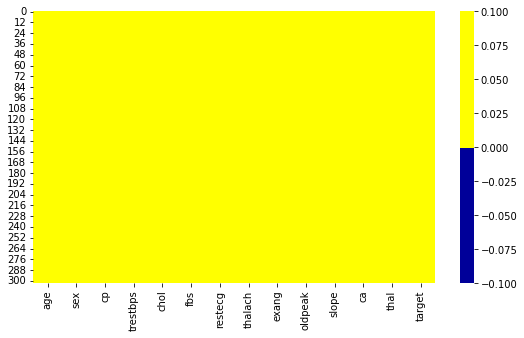

In [21]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is  missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))


In [25]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


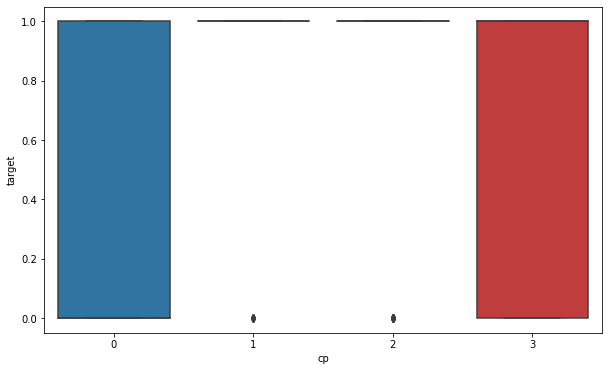

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x="cp", y="target", data=df, whis=5)
plt.show()

In [190]:
df[(df.cp==1) & (df.target==1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.300,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000,2,0,3,1
12,49,1,1,130,266,0,1,171,0,0.600,2,0,2,1
25,71,0,1,160,302,0,1,162,0,0.400,2,2,2,1
30,41,0,1,105,198,0,1,168,0,0.000,2,1,2,1
32,44,1,1,130,219,0,0,188,0,0.000,2,0,2,1
41,48,1,1,130,245,0,0,180,0,0.200,1,0,2,1
45,52,1,1,120,325,0,1,172,0,0.200,2,0,2,1


In [335]:
df[(df.cp==1) & (df.target==0)] #  it gives few informations to train data, so I prefr to drop this data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
171,48,1,1,110,229,0,1,168,0,1.000,0,0,3,0
172,58,1,1,120,284,0,0,160,0,1.800,1,0,2,0
226,62,1,1,120,281,0,0,103,0,1.400,1,1,3,0
247,66,1,1,160,246,0,1,120,1,0.000,1,3,1,0
248,54,1,1,192,283,0,0,195,0,0.000,2,1,3,0
277,57,1,1,124,261,0,1,141,0,0.300,2,0,3,0
278,58,0,1,136,319,1,0,152,0,0.000,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.000,2,1,2,0
302,57,0,1,130,236,0,0,174,0,0.000,1,1,2,0


In [336]:
df[(df.cp==1) & (df.target==0)].index

Int64Index([171, 172, 226, 247, 248, 277, 278, 287, 302], dtype='int64')

In [404]:
df.drop([171, 172, 226, 247, 248, 277, 278, 287, 302], inplace=True)

In [338]:
df[(df.cp==1) & (df.target==0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


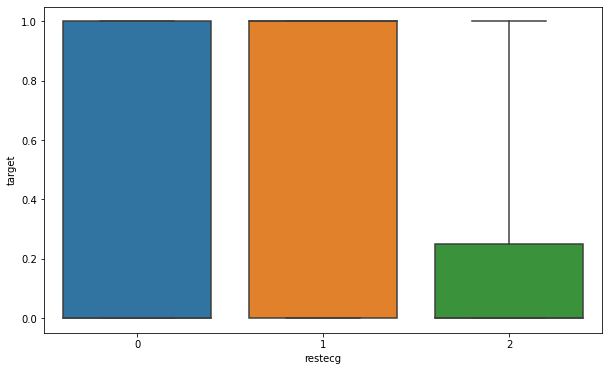

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x="restecg", y="target", data=df, whis=5)
plt.show()

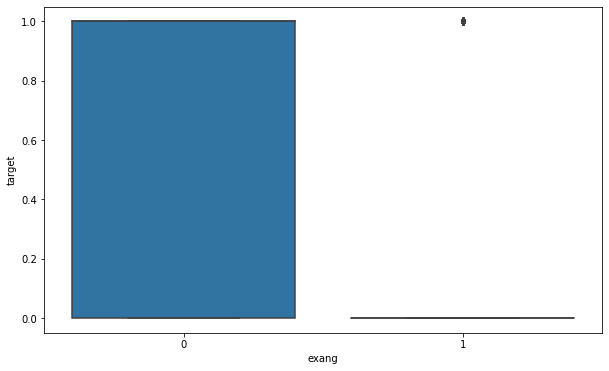

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(x="exang", y="target", data=df, whis=3)
plt.show()

In [64]:
len(df[(df.exang==1)&(df.target==1)])

23

In [63]:
len(df[(df.exang==1)&(df.target==0)])

75

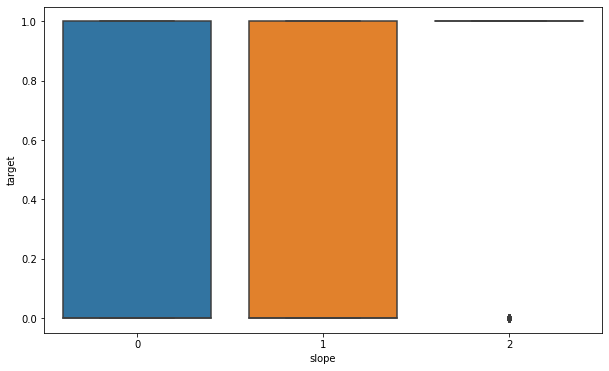

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x="slope", y="target", data=df, whis=3)
plt.show()

In [66]:
len(df[(df.slope==2)&(df.target==0)])

31

In [67]:
len(df[(df.slope==2)&(df.target==1)])

107

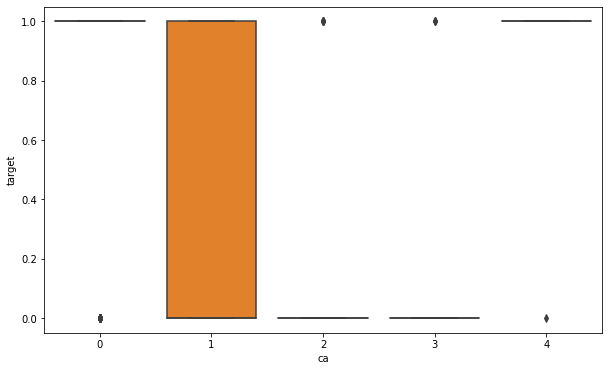

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(x="ca", y="target", data=df, whis=3)
plt.show()

In [70]:
len(df[(df.ca==2)&(df.target==1)])

7

In [71]:
len(df[(df.ca==2)&(df.target==0)])

30

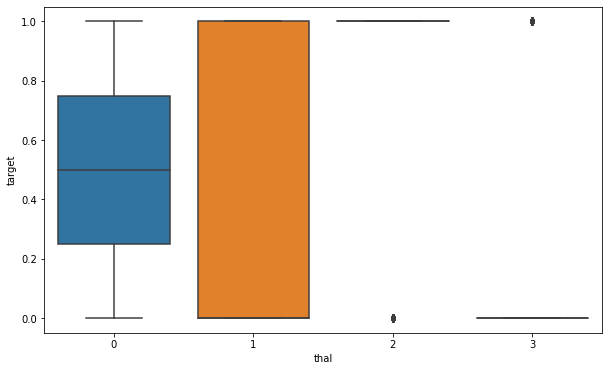

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(x="thal", y="target", data=df, whis=3)
plt.show()

In [40]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


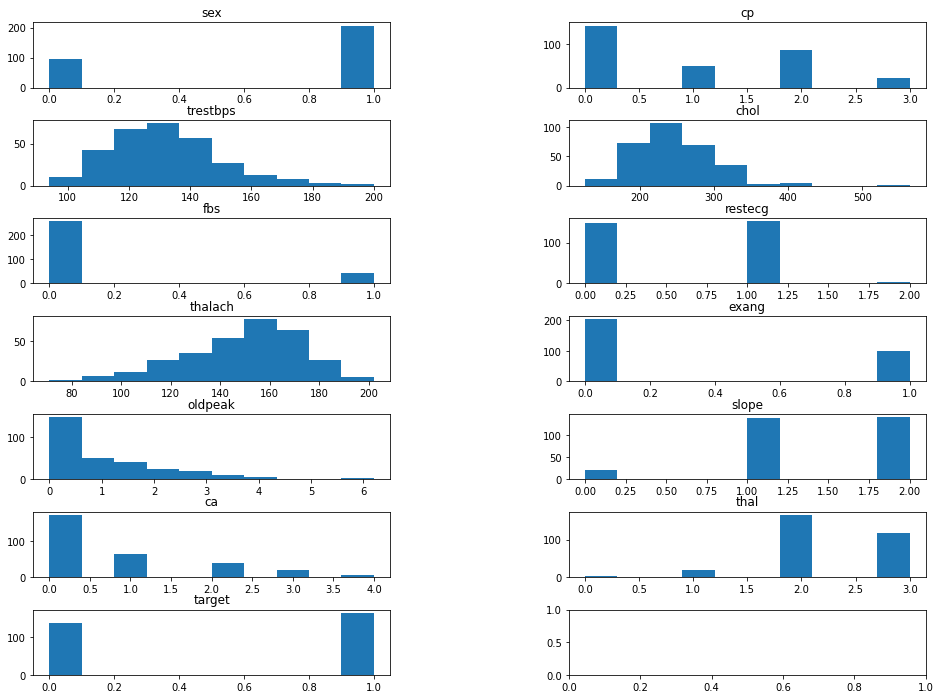

In [11]:
fig, ax = plt.subplots(nrows=r,ncols=c, figsize=(16,12))
fig.subplots_adjust(left=None,    bottom=None,    right=None,    top=None,    wspace=0.5,    hspace=0.5)

for i,col in enumerate(df.columns[1:]):
    ax[i//2,i%2].hist(df[col])
    ax[i//2,i%2].set_title(col)

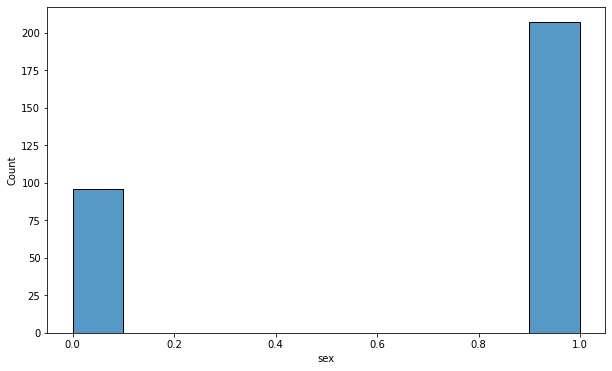

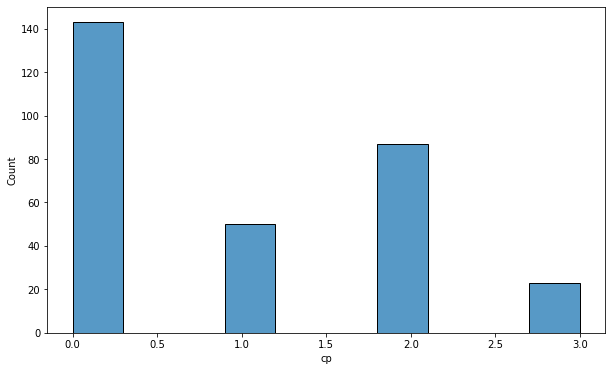

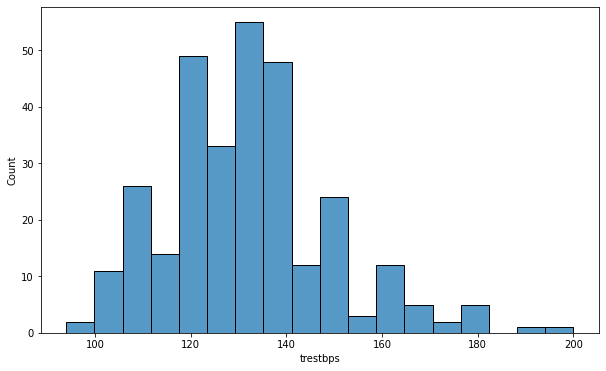

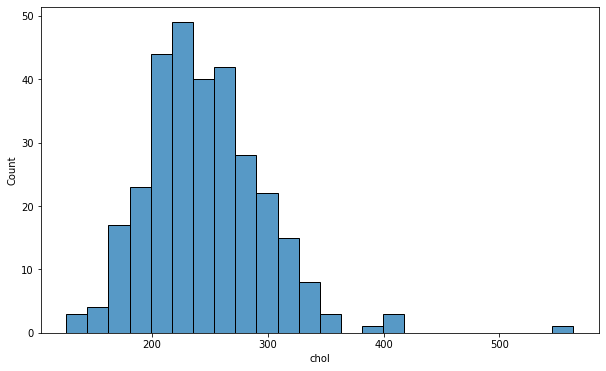

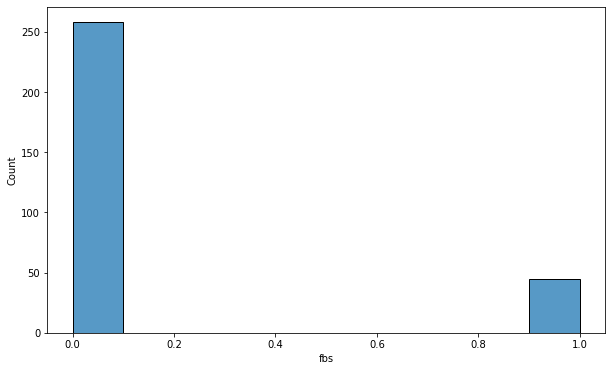

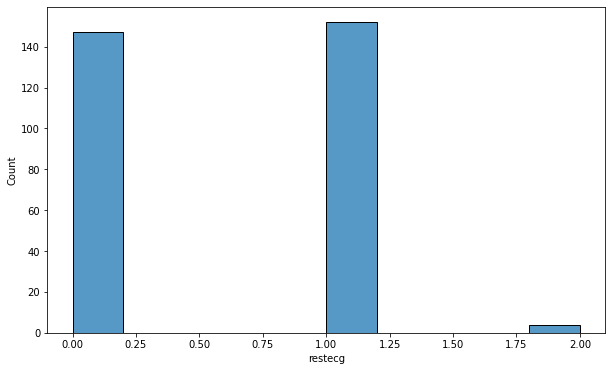

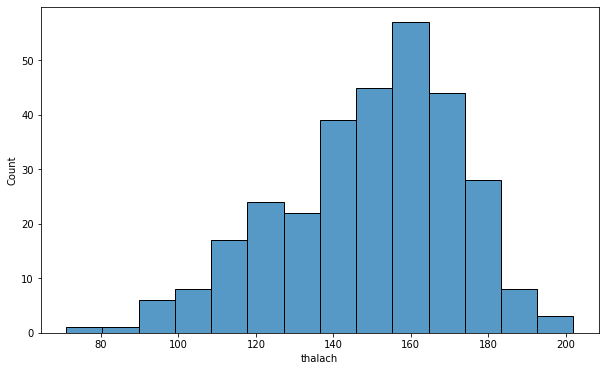

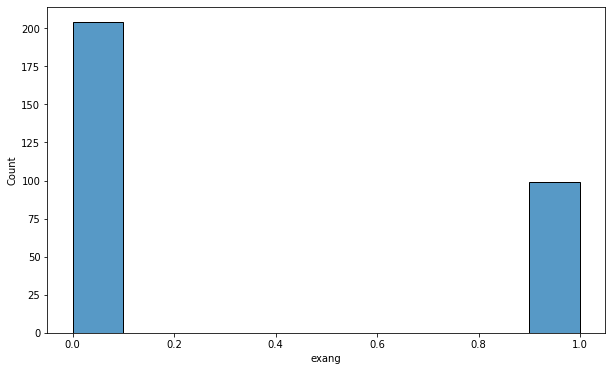

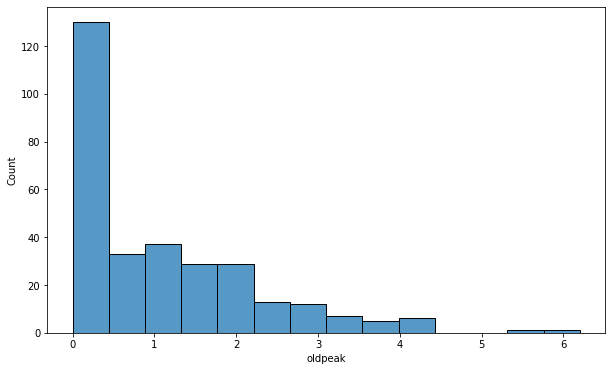

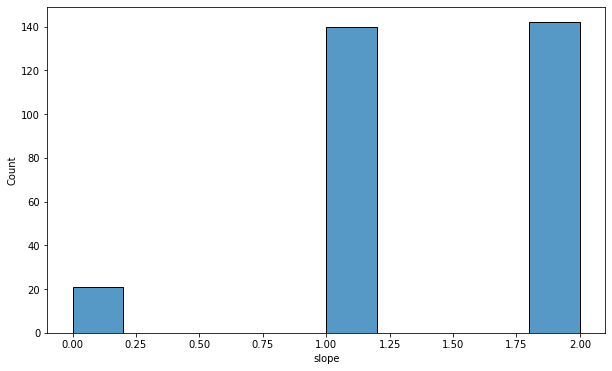

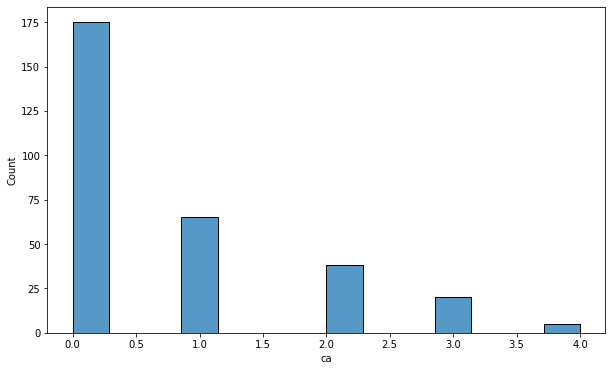

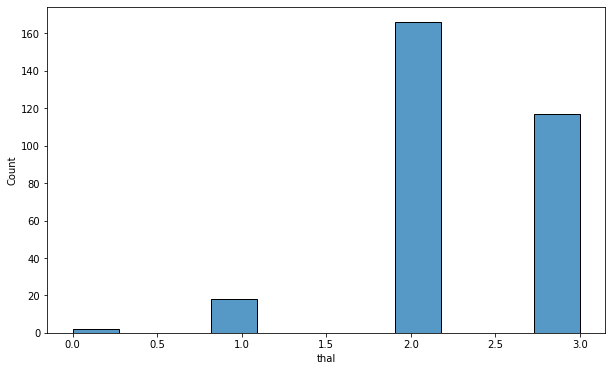

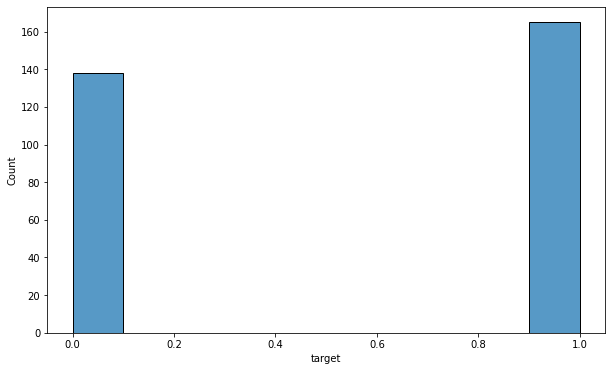

In [12]:
for i,col in enumerate(df.columns[1:]):
    plt.figure(i)
    sns.histplot(df[col])

In [13]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.210,-0.169,0.276,0.068,-0.225
sex,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.096,-0.031,0.118,0.210,-0.281
cp,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.149,0.120,-0.181,-0.162,0.434
trestbps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.193,-0.121,0.101,0.062,-0.145
chol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.054,-0.004,0.071,0.099,-0.085
fbs,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.006,-0.060,0.138,-0.032,-0.028
restecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.137
thalach,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.344,0.387,-0.213,-0.096,0.422
exang,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.288,-0.258,0.116,0.207,-0.437
oldpeak,0.210,0.096,-0.149,0.193,0.054,0.006,-0.059,-0.344,0.288,1.000,-0.578,0.223,0.210,-0.431


In [14]:
plt.rcParams["figure.figsize"] = (9,5)

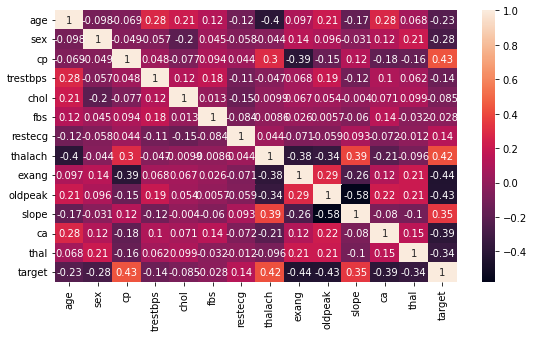

In [15]:
sns.heatmap(df.corr(), annot=True);

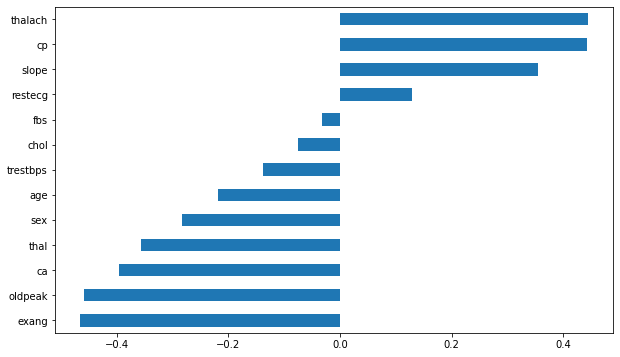

In [339]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["target"].drop("target").sort_values().plot.barh()

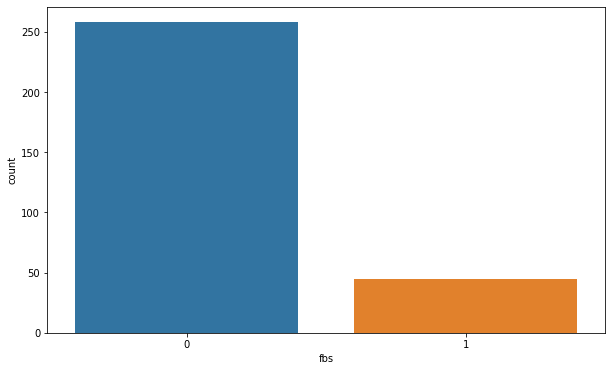

In [286]:
sns.countplot(df.fbs)

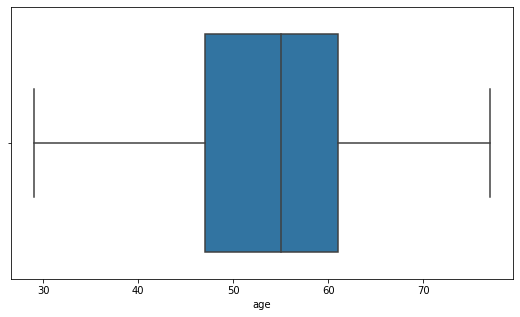

In [83]:
sns.boxplot(df.age)

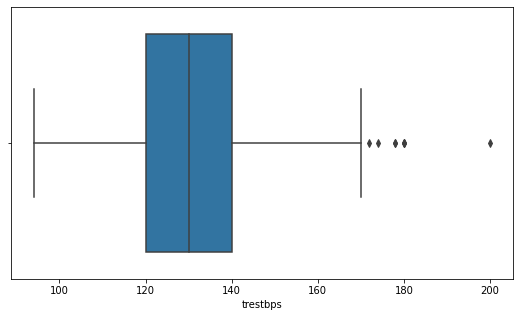

In [84]:
sns.boxplot(df.trestbps)

(array([[ 1.,  4.,  9., 14., 27., 39., 45., 35., 23.,  3.],
        [ 0.,  2.,  1., 11.,  8., 13., 30., 25.,  3.,  1.]]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <a list of 2 Lists of Patches objects>)

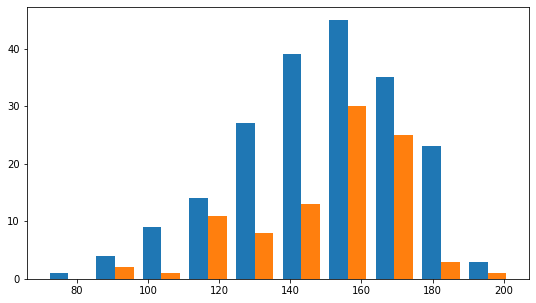

In [86]:
MaleHeartRate = df[["thalach"]].where(df["sex"]==1)
FemaleHeartRate = df[["thalach"]].where(df["sex"]==0)
plt.hist([MaleHeartRate["thalach"],FemaleHeartRate["thalach"]])

In [405]:
df = df.rename(columns={'cp':'Chest Pain' , 'trestbps':'BP','chol':'cholestoral','fbs':'fasting blood sugar','restecg':'Resting ECG','thalach':'Max Hear Rate','exang':'exercise induced angina','thal':'Thalassemia','num       ':'object'})
df

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Hear Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.000,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0


In [288]:
df.count()

age                        303
sex                        303
Chest Pain                 303
BP                         303
cholestoral                303
fasting blood sugar        303
Resting ECG                303
Max Hear Rate              303
exercise induced angina    303
oldpeak                    303
slope                      303
ca                         303
Thalassemia                303
target                     303
dtype: int64

In [406]:
for i in df.columns:
    if df[i].count() <  200:
        del df[i]

In [407]:
for i in df.columns:
    df[i]=df[i].replace("?",np.nan)
    df[i]=df[i].astype(float)

In [408]:
from sklearn.impute import SimpleImputer

In [409]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [410]:
imp_mean.fit(df)

SimpleImputer()

In [411]:
df = pd.DataFrame(imp_mean.transform(df), columns=df.columns)

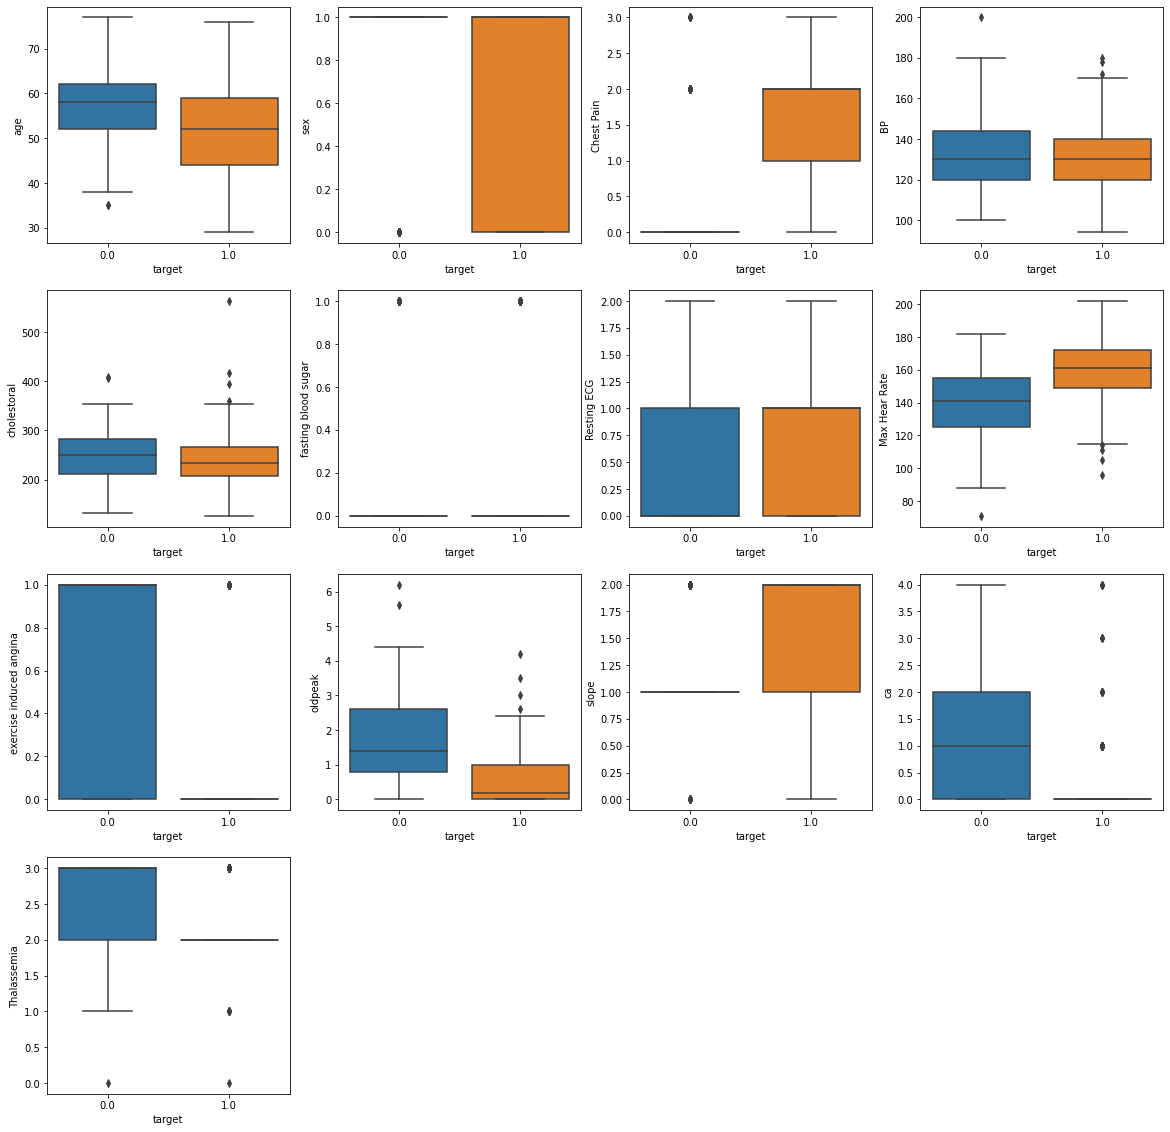

In [412]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='target',y=feature,data=df)

In [413]:
df = df.astype(int)

In [100]:
df

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Hear Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,59,1,0,164,176,1,0,90,0,1,1,2,1,0
290,57,0,0,140,241,0,1,123,1,0,1,0,3,0
291,45,1,3,110,264,0,1,132,0,1,1,0,3,0
292,68,1,0,144,193,1,1,141,0,3,1,2,3,0


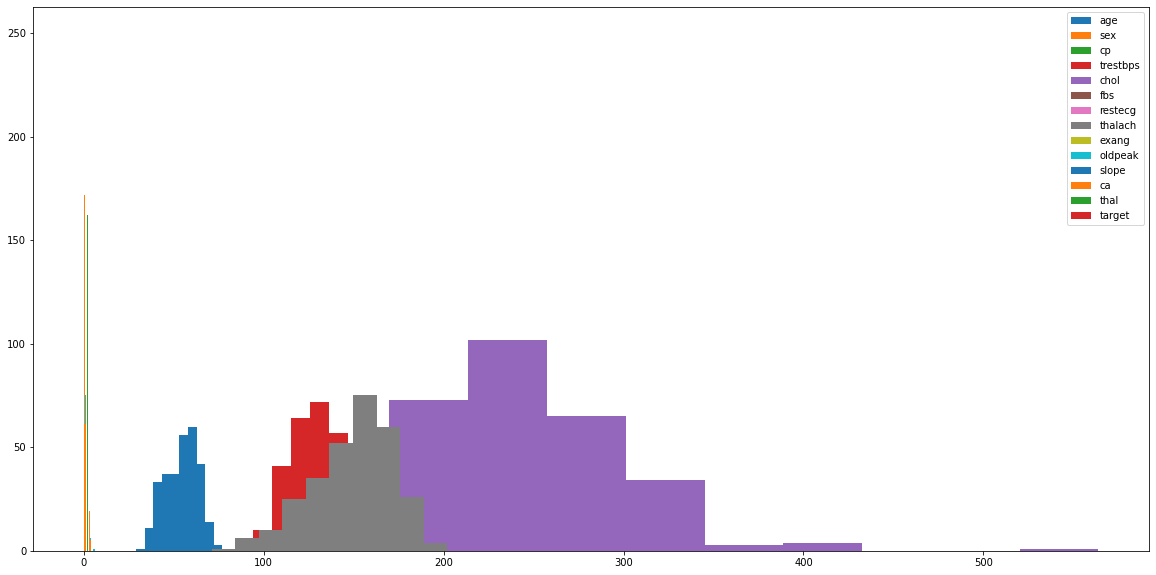

In [348]:
plt.figure(figsize=(20,10))
for i in df.columns:
    plt.hist(df[i] , label=i )
    plt.legend(loc='upper right') 

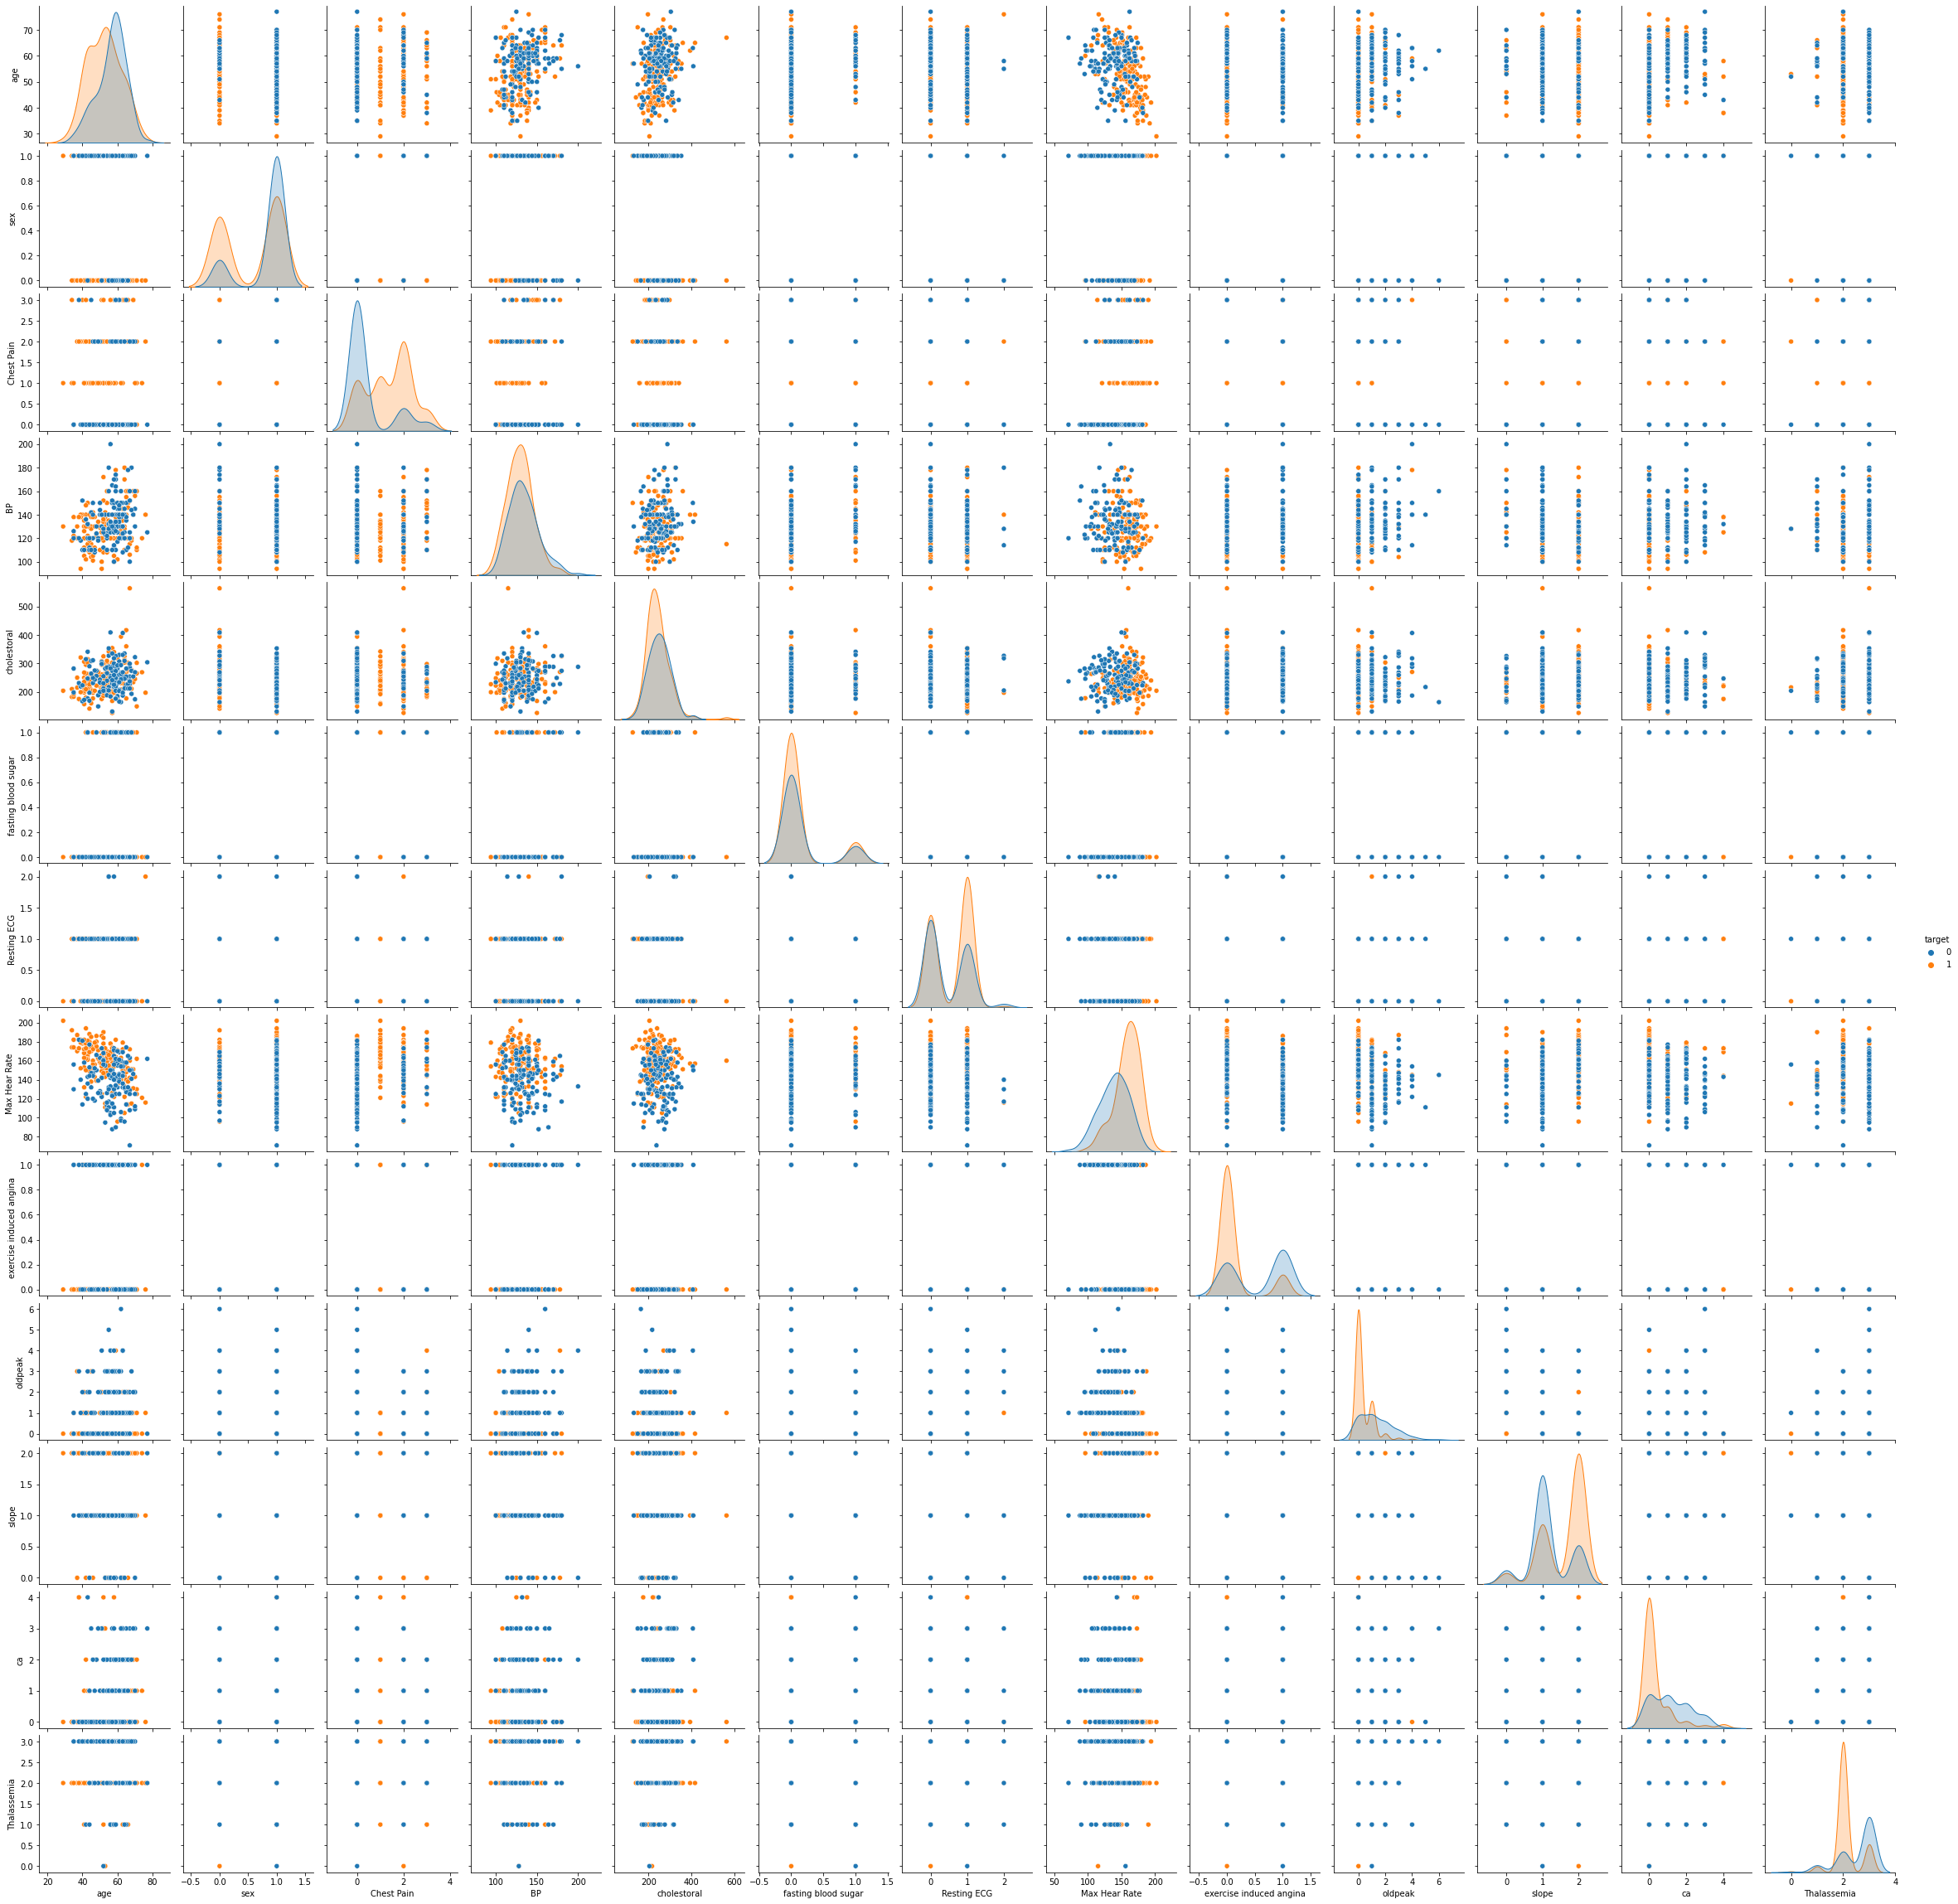

In [112]:
sns.pairplot(df, hue = "target")

# Data Preprocessing

## Train | Test Split and Scaling

In [414]:
X = df.drop('target', axis=1)
X.head()
X.index

RangeIndex(start=0, stop=294, step=1)

In [415]:
y = df.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [416]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=4)
len(X_train),len(y_train)

(235, 235)

In [417]:
from sklearn.preprocessing import StandardScaler

In [418]:
scaler = StandardScaler()

In [419]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [355]:
from sklearn.linear_model import LogisticRegression

In [356]:
logistic_model=LogisticRegression()

In [357]:
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [358]:
y_pred=logistic_model.predict(X_test_scaled)

In [359]:
y_pred_proba = logistic_model.predict_proba(X_test_scaled)

In [360]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
77,59,1,1,140,221,0,1,164,1,0,2,0,2,1,1,0.775
223,70,1,0,145,174,0,1,125,1,2,0,0,3,0,0,0.033
151,71,0,0,112,149,0,1,125,0,1,1,0,2,1,1,0.862
22,42,1,0,140,226,0,1,178,0,0,2,0,2,1,1,0.834
79,58,1,2,105,240,0,0,154,1,0,1,0,3,1,1,0.668
104,50,1,2,129,196,0,1,163,0,0,2,0,2,1,1,0.961
211,61,0,0,145,307,0,0,146,1,1,1,0,3,0,0,0.240
29,53,1,2,130,197,1,0,152,0,1,0,0,2,1,1,0.825
268,58,1,0,100,234,0,1,156,0,0,2,1,3,0,1,0.559
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1,1,0.945


## Model Performance on Classification Tasks

In [361]:
from sklearn.metrics import confusion_matrix, classification_report

In [362]:
def evaluation_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [363]:
evaluation_metric(logistic_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[19  7]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.82      0.97      0.89        33

    accuracy                           0.86        59
   macro avg       0.89      0.85      0.86        59
weighted avg       0.88      0.86      0.86        59


Train_Set
[[ 82  21]
 [ 11 121]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       103
           1       0.85      0.92      0.88       132

    accuracy                           0.86       235
   macro avg       0.87      0.86      0.86       235
weighted avg       0.87      0.86      0.86       235



## Cross Validate

In [364]:
from sklearn.model_selection import cross_validate

In [365]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.006,0.004,0.923,0.923,0.923,0.917
2,0.004,0.003,0.800,0.923,0.857,0.833
3,0.004,0.004,0.800,0.923,0.857,0.833
4,0.004,0.003,0.923,0.857,0.889,0.875
5,0.004,0.003,0.812,0.929,0.867,0.833
6,0.004,0.004,0.692,0.692,0.692,0.652
7,0.004,0.003,0.923,0.923,0.923,0.913
8,0.004,0.004,0.733,0.846,0.786,0.739
9,0.004,0.003,0.812,1.000,0.897,0.870
10,0.004,0.003,0.909,0.769,0.833,0.826


In [366]:
logistic_crosv=df_scores.mean()[2:]
logistic_crosv

test_precision   0.833
test_recall      0.879
test_f1          0.852
test_accuracy    0.829
dtype: float64

In [367]:
evaluation_metric(logistic_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[19  7]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.82      0.97      0.89        33

    accuracy                           0.86        59
   macro avg       0.89      0.85      0.86        59
weighted avg       0.88      0.86      0.86        59


Train_Set
[[ 82  21]
 [ 11 121]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       103
           1       0.85      0.92      0.88       132

    accuracy                           0.86       235
   macro avg       0.87      0.86      0.86       235
weighted avg       0.87      0.86      0.86       235



## GridSearchCV

In [368]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [369]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [370]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [371]:
grid_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

In [372]:
evaluation_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[19  7]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.82      0.97      0.89        33

    accuracy                           0.86        59
   macro avg       0.89      0.85      0.86        59
weighted avg       0.88      0.86      0.86        59


Train_Set
[[ 77  26]
 [  9 123]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.81       103
           1       0.83      0.93      0.88       132

    accuracy                           0.85       235
   macro avg       0.86      0.84      0.85       235
weighted avg       0.86      0.85      0.85       235



ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [373]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

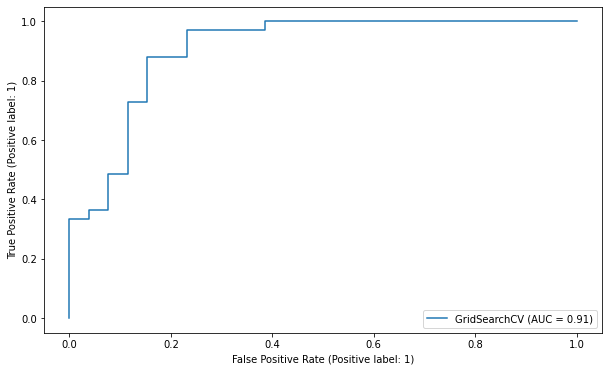

In [374]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

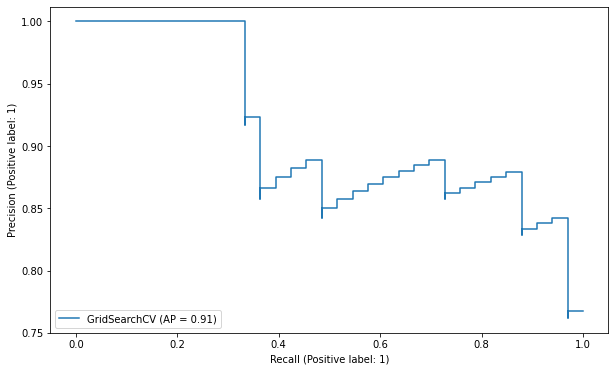

In [375]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

## Finding Best Threshold for max recall score

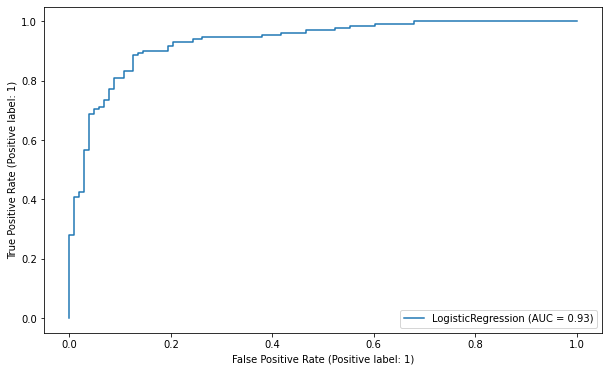

In [376]:
plot_roc_curve(logistic_model, X_train_scaled, y_train);

In [377]:
y_pred_proba = logistic_model.predict_proba(X_train_scaled) #
roc_auc_score(y_train, y_pred_proba[:,1])

0.9320388349514563

In [378]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [379]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6082325757584228

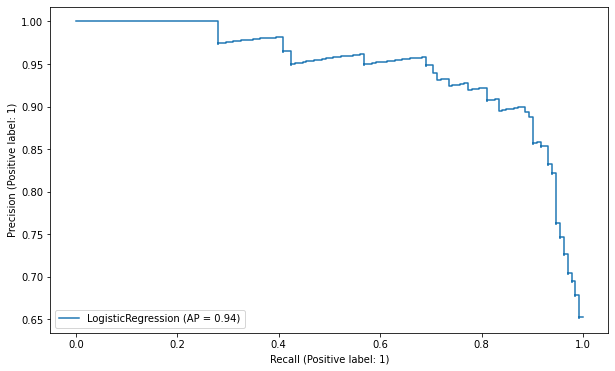

In [380]:
plot_precision_recall_curve(logistic_model, X_train_scaled, y_train);

In [381]:
y_pred_proba = logistic_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9447421793293208

In [382]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [383]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5723460668241496

In [384]:
grid_model.predict_proba(X_test_scaled)[:,1]

array([0.82958887, 0.83074552, 0.74274143, 0.5490831 , 0.72809148,
       0.76139696, 0.76749054, 0.22417233, 0.8373425 , 0.08190257,
       0.87344595, 0.66573675, 0.92578345, 0.26600306, 0.07295502,
       0.9150397 , 0.75751608, 0.14974629, 0.90131044, 0.3221772 ,
       0.69046088, 0.80422469, 0.48083062, 0.21375953, 0.10759533,
       0.79560015, 0.77607082, 0.03990262, 0.62904255, 0.88922653,
       0.82988089, 0.69625832, 0.54209172, 0.32752792, 0.29173715,
       0.73693082, 0.75635842, 0.797444  , 0.74421481, 0.79655481,
       0.08096897, 0.86649133, 0.81534309, 0.33521708, 0.08466043,
       0.20803858, 0.58507017, 0.54414371, 0.58294042, 0.39968276,
       0.76979723, 0.14154496, 0.35057978, 0.85573462, 0.95979759,
       0.76935542, 0.17317257, 0.92578345, 0.72437017])

In [385]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [386]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[20  6]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.83      0.91      0.87        33

    accuracy                           0.85        59
   macro avg       0.85      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59



In [387]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[ 85  18]
 [ 14 118]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       103
           1       0.87      0.89      0.88       132

    accuracy                           0.86       235
   macro avg       0.86      0.86      0.86       235
weighted avg       0.86      0.86      0.86       235



In [160]:
from sklearn.model_selection import StratifiedKFold

In [164]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import  f1_scores

In [168]:
import sklearn.metrics as metrics

In [389]:


def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    #f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        #f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
   # print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [392]:
model = LogisticRegression(C= 0.1, class_weight= 'None',penalty= 'l1',solver= 'saga')
CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)


Accuracy      83.41%  std 9.14%
Precision-1   85.08%  std 9.72%
Recall-1      86.32%  std 10.23%


## Finding Best Threshold for the most balanced score between recall and precision

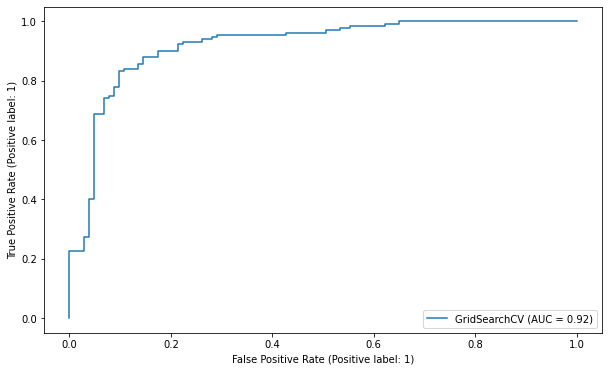

In [393]:
plot_roc_curve(grid_model, X_train_scaled, y_train);

In [394]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9248370575769986

In [395]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6220315647521549

In [396]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [397]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[21  5]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.85      0.88      0.87        33

    accuracy                           0.85        59
   macro avg       0.85      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59



In [398]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[ 93  10]
 [ 22 110]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       103
           1       0.92      0.83      0.87       132

    accuracy                           0.86       235
   macro avg       0.86      0.87      0.86       235
weighted avg       0.87      0.86      0.86       235



In [399]:
def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
   # f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        #f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
   # print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [400]:
model = LogisticRegression(C= 0.1, class_weight= 'None',penalty= 'l1',solver= 'saga')
CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      80.83%  std 8.89%
Precision-1   85.67%  std 9.06%
Recall-1      79.45%  std 10.95%


# Implement KNN and Evaluate

In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

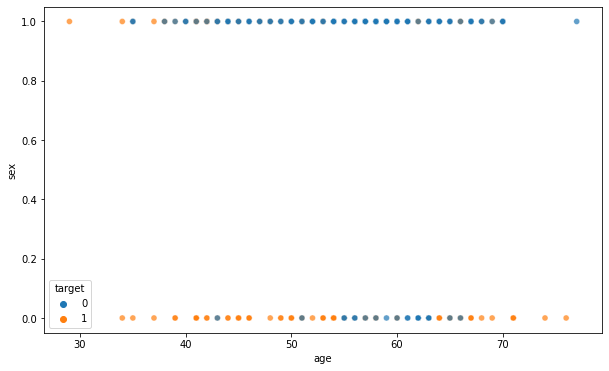

In [402]:
sns.scatterplot(x='age',y='sex',hue='target',data=df,alpha=0.7)

## Modelling

In [421]:
from sklearn.neighbors import KNeighborsClassifier

In [422]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [423]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [424]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [425]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [249]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.000,1.000
1,0.000,1.000
2,0.000,1.000
3,0.000,1.000
4,0.000,1.000
5,0.000,1.000
6,0.000,1.000
7,0.667,0.333
8,0.000,1.000
9,1.000,0.000


In [426]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [427]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
41,1,1,1.000,0.000
201,0,1,1.000,0.000
7,1,1,1.000,0.000
160,1,1,1.000,0.000
268,0,1,0.667,0.333
151,1,1,1.000,0.000
27,1,1,0.667,0.333
168,0,0,0.000,1.000
211,0,0,0.000,1.000
2,1,1,1.000,0.000


## Model Performance on Classification Tasks

In [428]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [429]:
confusion_matrix(y_test, y_pred)

array([[22,  4],
       [ 1, 32]])

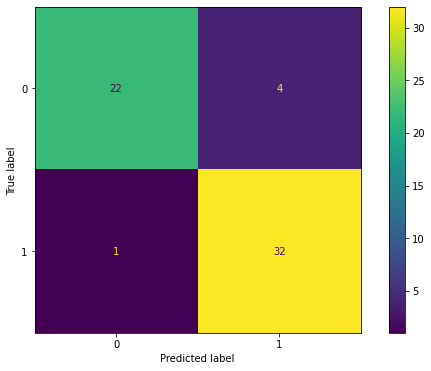

In [430]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [255]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  4]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.89      0.97      0.93        33

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59



## Elbow Method for Choosing Reasonable K Values

In [431]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [432]:
test_error_rates = []


for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

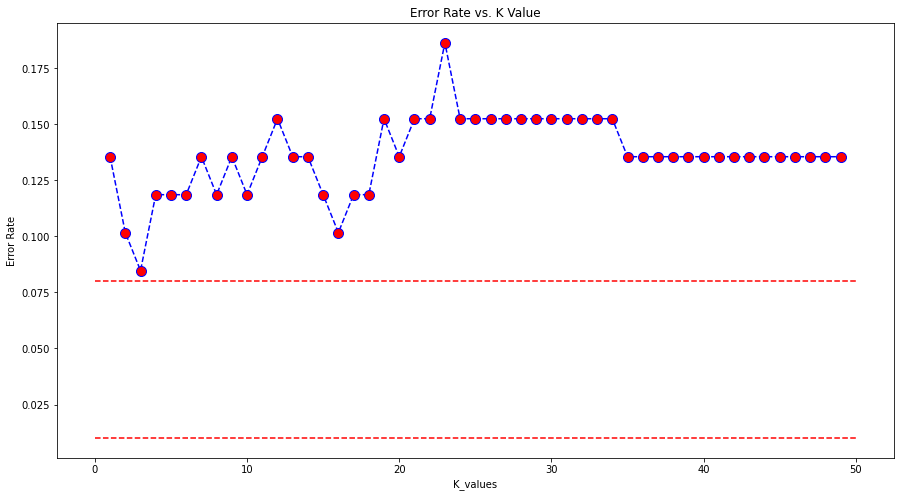

In [433]:
plt.figure(figsize=(15,8))
plt.plot(range(1,50), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.08, xmin = 0, xmax = 50, colors= 'r', linestyles="--")
plt.hlines(y=0.010, xmin = 0, xmax = 50, colors= 'r', linestyles="--")

## Scores by Various K Values

In [434]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [435]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_scaled,y_train)
print('WITH K=4\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=4

Test_Set

[[22  4]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.88      0.91      0.90        33

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59


Train_Set

[[ 94   9]
 [ 19 113]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       103
           1       0.93      0.86      0.89       132

    accuracy                           0.88       235
   macro avg       0.88      0.88      0.88       235
weighted avg       0.88      0.88      0.88       235



In [436]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled,y_train)
print('WITH K=3\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=3

Test_Set

[[22  4]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.89      0.97      0.93        33

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59


Train_Set

[[ 89  14]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       103
           1       0.89      0.90      0.90       132

    accuracy                           0.89       235
   macro avg       0.88      0.88      0.88       235
weighted avg       0.89      0.89      0.89       235



## Cross Validate For Optimal K Value

In [437]:
from sklearn.model_selection import cross_val_score, cross_validate

In [438]:
model = KNeighborsClassifier(n_neighbors=4)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores_knn = pd.DataFrame(scores, index = range(1, 11))
df_scores_knn

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.003,0.008,0.917,0.923,0.923,0.923
2,0.001,0.006,0.792,0.833,0.769,0.800
3,0.001,0.010,0.833,0.846,0.846,0.846
4,0.002,0.006,0.833,0.917,0.786,0.846
5,0.001,0.005,0.833,0.857,0.857,0.857
6,0.001,0.006,0.565,0.636,0.538,0.583
7,0.001,0.005,1.000,1.000,1.000,1.000
8,0.001,0.005,0.870,0.917,0.846,0.880
9,0.001,0.005,0.870,1.000,0.769,0.870
10,0.001,0.005,0.826,0.909,0.769,0.833


In [439]:
knn_best=df_scores_knn.mean()[2:]
knn_best

test_accuracy    0.834
test_precision   0.884
test_recall      0.810
test_f1          0.844
dtype: float64

## Evaluating ROC Curves and AUC

In [440]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [441]:
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_train)

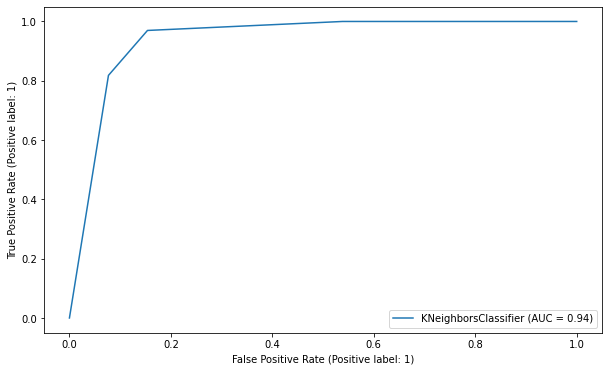

In [442]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [443]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9405594405594406

Grid Search for best K values

In [444]:
grid={"n_neighbors":np.arange(1, 50)}
knn=KNeighborsClassifier()
knn_cv= GridSearchCV(knn, grid, cv=10)
knn_cv.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [445]:
print("tuned hyperparameter K: ", knn_cv.best_params_)

tuned hyperparameter K:  {'n_neighbors': 4}


In [446]:
print(" best score with tuned hyperparameter K: ", knn_cv.best_score_)

 best score with tuned hyperparameter K:  0.8338768115942029


####Although according to grid search method best K value 4 is, we get best scores with K value 3.

# Visually compare models based on your chosen metric

In [447]:
scores=pd.concat([logistic_crosv, knn_best], axis = 1)
scores

,0,1
test_precision,0.833,0.884
test_recall,0.879,0.810
test_f1,0.852,0.844
test_accuracy,0.829,0.834


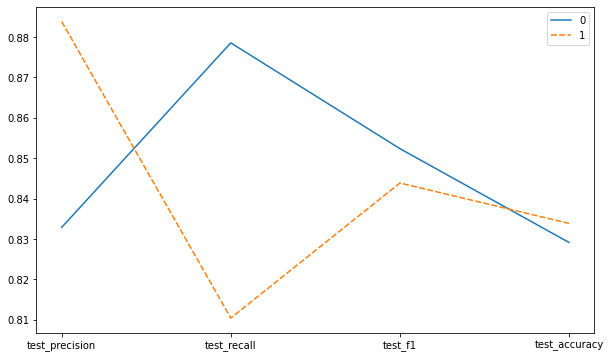

In [448]:
sns.lineplot(data = scores);

for this data recall is very important, lives are at stake, becouse higher recall helps us to make good prediction about person who has heart disease.

# Chose best model and make a random prediction 

In [454]:
scaler = StandardScaler().fit(X)

In [455]:
import pickle
pickle.dump(scaler, open("scaler_heart", 'wb'))

In [456]:
X_scaled = scaler.transform(X)

In [457]:
final_model = LogisticRegression(C= 0.1, class_weight= 'None',penalty= 'l1',solver= 'saga').fit(X_scaled, y)

In [458]:
pickle.dump(final_model, open("final_model_heart", 'wb'))

In [460]:
df

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Hear Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,59,1,0,164,176,1,0,90,0,1,1,2,1,0
290,57,0,0,140,241,0,1,123,1,0,1,0,3,0
291,45,1,3,110,264,0,1,132,0,1,1,0,3,0
292,68,1,0,144,193,1,1,141,0,3,1,2,3,0


In [459]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,294.000,54.272,9.168,29.000,47.000,55.000,61.000,77.000
sex,294.000,0.680,0.467,0.000,0.000,1.000,1.000,1.000
Chest Pain,294.000,0.966,1.048,0.000,0.000,1.000,2.000,3.000
BP,294.000,131.415,17.242,94.000,120.000,130.000,140.000,200.000
cholestoral,294.000,245.738,52.290,126.000,210.250,240.000,274.000,564.000
fasting blood sugar,294.000,0.150,0.357,0.000,0.000,0.000,0.000,1.000
Resting ECG,294.000,0.534,0.526,0.000,0.000,1.000,1.000,2.000
Max Hear Rate,294.000,149.544,22.777,71.000,133.250,152.500,166.000,202.000
exercise induced angina,294.000,0.333,0.472,0.000,0.000,0.000,1.000,1.000
oldpeak,294.000,0.779,1.081,0.000,0.000,0.000,1.000,6.000


In [461]:
my_dict = {"age": [33, 61, 15],
           "sex": [1, 0, 1],
           "Chest Pain": [2, 0, 1],
           "BP": [120, 130, 125],
           "cholestoral": [400, 120, 255],
           "fasting blood sugar": [1, 0,1],
           "Resting ECG": [0, 0, 1],
           "Max Hear Rate": [90, 140, 70],
           "exercise induced angina": [0, 0, 1],
           "oldpeak": [0, 1, 3],
           "slope": [0, 1, 2],
           "ca": [0, 1, 0],
           "Thalassemia": [1, 2, 3]
          }

In [462]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Hear Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia
0,33,1,2,120,400,1,0,90,0,0,0,0,1
1,61,0,0,130,120,0,0,140,0,1,1,1,2
2,15,1,1,125,255,1,1,70,1,3,2,0,3


In [463]:
scaler_heart = pickle.load(open("scaler_heart", "rb"))

In [464]:
sample_scaled = scaler_heart.transform(sample)
sample_scaled

array([[-2.32426282,  0.68556546,  0.98855647, -0.66315621,  2.95516856,
         2.38365647, -1.01637818, -2.61869205, -0.70710678, -0.72152203,
        -2.28438098, -0.70550745, -2.15417349],
       [ 0.73511222, -1.45864991, -0.92351986, -0.08220292, -2.40874289,
        -0.41952354, -1.01637818, -0.41974465, -0.70710678,  0.20479883,
        -0.65426446,  0.27288496, -0.51342995],
       [-4.29100392,  0.68556546,  0.0325183 , -0.37267956,  0.1774287 ,
         2.38365647,  0.88690325, -3.498271  ,  1.41421356,  2.05744056,
         0.97585207, -0.70550745,  1.12731359]])

In [465]:
final_model = pickle.load(open("final_model_heart", "rb"))

In [467]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [468]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.34"] = predictions2
sample

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Hear Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,pred_proba,pred_0.50,pred_0.34
0,33,1,2,120,400,1,0,90,0,0,0,0,1,0.713,1,1
1,61,0,0,130,120,0,0,140,0,1,1,1,2,0.578,1,0
2,15,1,1,125,255,1,1,70,1,3,2,0,3,0.059,0,0
